# Table of Contents
 <p><div class="lev1 toc-item"><a href="#The-SciPy-Ecosystem" data-toc-modified-id="The-SciPy-Ecosystem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The SciPy Ecosystem</a></div><div class="lev1 toc-item"><a href="#Pandas" data-toc-modified-id="Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas</a></div><div class="lev1 toc-item"><a href="#NumPy" data-toc-modified-id="NumPy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NumPy</a></div><div class="lev1 toc-item"><a href="#SciPy" data-toc-modified-id="SciPy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SciPy</a></div><div class="lev1 toc-item"><a href="#Matplotlib" data-toc-modified-id="Matplotlib-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Matplotlib</a></div><div class="lev2 toc-item"><a href="#Matplotlib-Architecture" data-toc-modified-id="Matplotlib-Architecture-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Matplotlib Architecture</a></div><div class="lev2 toc-item"><a href="#More-on-the-Artist-Heirarchy" data-toc-modified-id="More-on-the-Artist-Heirarchy-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>More on the Artist Heirarchy</a></div><div class="lev2 toc-item"><a href="#More-on-Backends" data-toc-modified-id="More-on-Backends-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>More on Backends</a></div><div class="lev2 toc-item"><a href="#Pylab-and-Pyplot" data-toc-modified-id="Pylab-and-Pyplot-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Pylab and Pyplot</a></div>

# The SciPy Ecosystem

 The "SciPy ecosystem" is a collection of Python packages designed to streamline many of the common tasks involved in data science. We'll begin this workshop by taking a look at four of those packages, focusing on the features that I find most important and occasionally highlighting similarities and differences with how things work in R.

- https://www.scipy.org/

# Pandas
Pandas is the top package for manipulating tabular-form data. The most important aspect of Pandas is that it defines a DataFrame class that comes with many convenient methods that R users are used to.

In [ ]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv"
z = pd.read_csv(data_url) # import data as a DataFrame, analogous to "read.csv(data_url)"



## BASICS

z.head() # analogous to "head(z)"
z.head(20) # analogous to "head(z, 10)"
z.shape # analogous to "dim(z)"
z.columns # analogous to "names(z)"
z.describe() # analogous to "summary(z)"



### SUBSETTING


## retrieving specified columns

z["x"]
z[["x", "y"]]


## retrieving the rows that satisfy a specified condition

z["x"] > 10 # creates a vector of True/False values telling you whether each row's x-val is > 10
z[z["x"] > 10] # selects the rows that have x-val > 10
z[(z["x"] > 10) & (z["dataset"]=="II")] # selects the rows that have x-val > 10 and dataset equal to "II"
z[(z["x"] > 10) | (z["dataset"]=="II")] # selects the rows that have x-val > 10 or dataset equal to "II"



## subsetting by INDEX: iloc

# - single argument retrieves row, two arguments specify row(s) then column(s)

z.iloc[0]
list(z.iloc[0])
z.iloc[:4, :] # rows 0 through 3, all columns
z.iloc[1:4, 1:3] # rows 1 through 3, columns 1 through 2


## subsetting by NAME: loc

# - again, single argument retrieves row, two arguments specify row(s) then column(s)

z.loc[0] # the first row has 0 as its rowname
# But be careful: index names are preserved when new objects are created by subsetting
zz = z.iloc[3:6, :]
zz
zz.iloc[0] # zz has a row with index 0
zz.loc[0] # but its first row isn't named 0
zz.loc[3] # it's name is (still) 3
z.loc[3:6] # also notice that BOTH endpoints are included when using names - very tricky!

z.loc[:4, "x"]
z.loc[:, ["x", "y"]] # same as z[["x", "y"]]



# REMINDER about list pointers and copy()
# Let's see a behavior of lists that can be confusing
zz.loc[3, "x"] = -1
zz
z.head() # it changed the original DataFrame as well!
z.loc[3, "x"] = 9 # let's change it back

zz = z.iloc[3:6, :].copy() # to prevent this issue, we could have explicitly made a copy
zz.loc[3, "x"] = -1 # change the copy
z.head() # check the original
# we've verified that this time, we didn't change the original, only the copy

In [ ]:
## EXERCISE: Find the sample standard deviation of the y-values in dataset III.
##           (Remember the "describe" function.)

In [ ]:
## CALCULATIONS

# Pandas defines a Series object type; each column of a DataFrame is a Series.
# In fact, a DataFrame is a dictionary
# - each key is a variable name and its value is the corresponding column.
type(z[["x", "y"]])
type(z["x"])

# The head, describe, mean, and additional methods listed here work on Series objects
# or can be easily "applied" to the columns or rows of a DataFrame
z["x"].mean()
z["x"].sum()
z["x"].std()
z["x"].min()
z["x"].abs()
z["x"].median()

# apply to every column or to every row
z.mean() # analogous to "apply(z, 2, mean)"
z.mean(axis=1) # "apply(z, 1, mean)"
# can also use an "apply" method to specify your own function
z[["x", "y"]].apply(sum)
z[["x", "y"]].apply(sum, axis=1)

# easily perform an arithmetic operation to every entry of a Series
z["x"]**2 # "z$x^2" in R
3*z["x"] # "3*z$x" in R
# you can't use this syntax with ordinary Python lists!
# you'd use "list comprehension" instead: [3*i for i in z["x"]]

# multiply two vectors, entry by entry
z["x"]*z["y"]
# dot product of x and y:
sum(z["x"]*z["y"])

# splitting up by a categorical variable
# The "groupby" function in Pandas is analogous to "aggregate" or "split" in R.
z.groupby(z["dataset"]).describe()

# correlation matrix of each group
z.groupby(z["dataset"]).corr()

# You can loop through the groups
for groupname, groupdata in z.groupby("dataset"):
    print(groupname)
    print(groupdata)

for name, group in z.groupby("dataset")["x"]:
    print(name)
    print(group)

In [ ]:
## EXERCISE: Find the dot product of x and y within each of the four datasets.

In [ ]:
## PLOTTING

z1 = z[z["dataset"]=="I"] # dataset "I"

z1["x"].plot(kind="hist")
# My plot appears in new window (check behind Spyder if you don't see it)
# Note you can save a plot from the Spyder console by right-clicking it
# and selecting "Save Image As..."
# Or if your plot is in a pop-up window, that window has a save button.

z1.plot(kind="scatter", x="x", y="y")

z.groupby(z["dataset"]).plot(kind="scatter", x="x", y="y")

# Pandas only has some basic plotting capabilities.
# For more sophisticated plotting, we'll use Matplotlib below.

# NumPy
Some NumPy functionality is automatically imported with and used by Pandas

In [ ]:
import numpy as np

## LINEAR REGRESSION

fit = np.polyfit(z1["x"], z1["y"], 1) # least-squares fit of first-order polynomial (i.e. line)
fit # Careful: this is slope then intercept - reversed order compared to R

# redraw scatterplot with least-squares line
z1.plot(kind="scatter", x="x", y="y").plot(z1["x"], fit[0]*z1["x"] + fit[1], color="Red")

In [ ]:
## ARRAYS

a = np.array([1, 3, 2]) # one-dimensional array, i.e. vector
a
np.array((1, 3, 2)) # or putting a tuple rather than list - creates same array
a[:2] # subsetting works as usual for Python lists

b = np.array([a, (4, 5, 6)]) # two-dimensional array, i.e. matrix
b
print(b)

b[:, :2] # subsetting all rows and first two columns
b[0, 1] = 8 # set row 0 column 1 entry to 8
print(b)

b[0] # if only one index is provided, it refers to the row(s) and full column slices are taken
b[-1]

# arithmetic operations apply to each entry of an array
b+1
2*b
b**2
2*b - b # subtracts corresponding entries
# (in fact Pandas Series objects are a type of array - they inherit this behavior)

b.sum(axis=0)
b.sum(axis=1)
b.sum() # adds up all the numbers in the matrix

# more sophisticated vector and matrix operations
a.mean() # an equivalent command is "np.mean(a)"
a.var()
a.argmax()
a.sort() # note that this is an in-place function! it changes the object rather than just returning a sorted version
a

np.dot(b[0], b[1]) # dot product

b.transpose() # equivalently "np.transpose(b)"
np.cov(b) # covariance matrix
b @ b.transpose() # matrix multiplication

np.linalg.svd(b) # singular value decomposition



## MATHEMATICAL FUNCTIONS AND CONSTANTS

np.cos(np.pi)
np.exp(np.log(np.sqrt(25)))


# https://www.numpy.org/devdocs/user/quickstart.html


## EXERCISE: Find the variance of each row of b.

# SciPy 

Note that the SciPy package is one of the many packages in the SciPy ecosystem. The terminology can be confusing!

In [ ]:
## LINEAR ALGEBRA

from scipy.linalg import svd, inv

svd(b) # singular value decomposition, agrees with the NumPy function
inv(b @ b.transpose()) # inverse matrix

# https://docs.scipy.org/doc/scipy/reference/linalg.html



## PROBABILITY DISTRIBUTIONS

from scipy.stats import norm # functions for Normal distributions
from scipy.stats import f # functions for F distributions

# cdf and inverse cdf
2*norm.cdf(-2) # twice the probability of a standard Normal draw being less than -2
norm.ppf(.975) # a standard Normal draw has probability .975 of being less than this value

1-f.cdf(2, 1, 12) # probability that a draw from f_{1, 12} is greater than 2


# simulating random samples

norm.rvs(size=10)
f.rvs(1, 12, size=10)

# For more functions and distributions, see
# https://docs.scipy.org/doc/scipy/reference/stats.html

# https://www.tutorialspoint.com/scipy/scipy_introduction.htm

# Matplotlib

## Matplotlib Architecture
Matplotlib is a module which defines classes and their methods for **all** the components necessary to create a wide variety of plots e.g. axes, titles, lines, text, patches etc. These classes are organized somewhat heirarchically so that e.g. a `Figure` object (basically everything you see in any graphic) can own several `Axes` objects (what we consider a "plot" - a rectangular region on the figure) which in turn can own e.g. `line` (an actual plotted line) or `title` objects. **Working explicitly with these heirarchically organized classes and their methods is known as the object-oriented approach for matplotlib, or else as using the "class library". The alternative to the full OO approach is a submodule within matplotlib called `pyplot` which defines functions that *implicity* create and manipulate these objects to script common plotting tasks.** Using `pyplot` functions to achieve plotting requires fewer lines of code, but it often does not allow full access to the created objects and thus limits customization. According to the official docs for non-interactive programming it is recommended to use the `pyplot` convenience functions for *creating* the axes and figure objects, and then use the class methods of those objects to achieve the actual plotting. 

All of the classes mentioned above in the OO approach are derived from a base class called `Artist` and together they make up the Artist "layer" of matplotlib. There is a layer of class definitions "below" the Artist layer which is called the **Backend layer and defines interface classes that dictate how plots are actually rendered to various outut devices, or what to do with user interactions like clicks. There are "backends" for e.g. writing to a file versus rendering on screen.** To select an interactive back-end you can do `ipython --matplotlib` or in Jupyter notebook use `%matplotlib notebook` for inline. Finally, it may be helpful to think of `pyplot` as a final layer on top of the Artist layer. A nice picture of these three "layers" (backend, artist, pyplot/scripting) is [here](http://creately.com/diagram/example/hqz3w6j12/Matplotlib%203-tiered%20architecture). 

Below is an example of achieving the same plotting result using the class-library OO approach versus the state-machine pyplot scripting approach:

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(10000)

####################################
# The object-oriented (class library) approach
####################################
# Import the FigureCanvas from the backend of your choice and attach the Figure artist to it.
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# Now use a figure method to create an Axes artist; the Axes artist is
#  added automatically to the figure container fig.axes.
# Here "111" is from the MATLAB convention: create a grid with 1 row and 1
#  column, and use the first cell in that grid for the location of the new
#  Axes.
ax = fig.add_subplot(111)

# Call the Axes method hist to generate the histogram; hist creates a
#  sequence of Rectangle artists for each histogram bar and adds them
#  to the Axes container.  Hesre "100" means create 100 bins.
ax.hist(x, 100)

# Decorate the figure with a title and save it.
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')

####################################
# The pyplot state-machine (scripting) approach
####################################
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')

####################################
# Joint approach
####################################
fig, ax = plt.subplots(111)  # Use pyplot convenience function for fig & axes creation, storing handles to those objects
ax.hist(x, 100)  # Use an Axes method to create further plotting elements.
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')

## More on the Artist Heirarchy
The classes defined in the Artist layer are organized heirarchically. The `figure` object is the top tier, and owns a couple of specialized artists like `title` and `legend`, but most importantly a `figure` owns at least one `Axes` artist. The `Axes` class methods is where most of the actual plotting functionality is implemented, and an `Axes` owns other important artists like `line2D` or `XAxis`. The `XAxis` objects owns `x-label` and `x-ticks` objects, and similarly for `YAxis`. A good picture of this heirarchy can be found [here](http://www.aosabook.org/en/matplotlib.html#fig.matplotlib.artistsfigure). **The artist classes can be divided into "primitive" artists - components you see in a plot like `Line2D`, `Rectangle`, `Circle`, and `Text`, and "composite" artists which contain primitive and/or other composite artists within themselves.** As an example to tie this all together, the class method `Axes.hist()` creates many `rectangle` primitive objects which are stored within `Axes.patches`. 

Below is a really neat example to demonstrate the power of working within the class library. We want our graphic to only have solid lines on the bottom and left hand edges of the plotting region. Recall that the plotting region is controlled by the `Axes` object, which owns a `rectangle` that constitutes the 'background' of the plot area. We can change the edge colors of the rectangle to be the same as it's face color to get rid of all the edges. We can then add two `line2D` objects to the `Axes` and locate them along the bottom and left edge respectively:

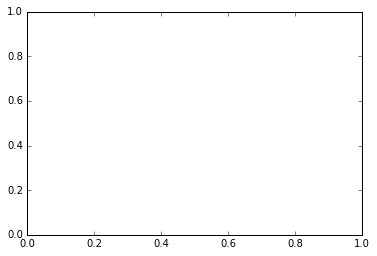

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# use pyplot to create the figure and it's axes object
fig = plt.figure()  # create a figure object
ax = fig.add_subplot(111)  # create an axes object in the figure
# set the edgecolor and facecolor of the axes rectangle to be the same
frame = ax.axesPatch
frame.set_edgecolor(frame.get_facecolor())
# Specify a line in axes coords to represent the left and bottom axes.
# transAxes means coords are relative to the axes bounding box (0,0 being the lower left and 1,1 being upper right).
bottom = mpl.lines.Line2D([0, 1], [0, 0], transform=ax.transAxes)
left = mpl.lines.Line2D([0, 0], [0, 1], transform=ax.transAxes)
ax.add_line(bottom)
ax.add_line(left)

`Spine` objects (subclassed from `patch`) are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions. Another way to "remove the top and right borders are by setting the spines and tickmarks visibility:

In [1]:
# use pyplot to create the figure and it's axes object
fig = plt.figure()  # create a figure object
ax = fig.add_subplot(111)  # create an axes object in the figure

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

NameError: name 'plt' is not defined

A random note that is of interest is that there are many relevant coordinate systems involved in matplotlib plotting such as:
- data coordinates: the original raw data values
- axes coordinates: the space defined by a particular axes rectangle
- figure coordinates: the space containing the entire figure
- display coordinates: the physical coordinates used in the output (e.g. points in PostScript, pixels in PNG)
Every Artist has a transformation node that knows how to transform from one coordinate system to another.

In summary: a `Figure` is the top-level entire graphic, `Axes` is the region of the image with the data space (what we think of as a plot), `Axis` are the number-line-like objects that set the graph limits and generate the ticks (marks on the axis) and ticklabels (strings labeling the ticks). Other important artists are: `Line2D` (store lines with a variety of styles), `Text` (store text in a variety of styles), `Patch` (wo dimensional shape with face and edge), and `Ticks` (indicators of where on an axis a particular value lies).

## More on Backends
The backend is the behind-the-scenes code that handles how to "output" the results of plotting e.g. an interactive window that pops up, an image file, or an embedded plot in an application. Each target "output" has a unique backend - some are interactive while some are non-interactive and just make files. To run a python script using a particular backend you can do ` python script.py -d backend` whereas the backend can be fixed for a script by adding a line at the top `matplotlib.use(backend)`.

When using an interactive back-end that pops up a plotting window, an important thing to note is that pyplot functions contain a final call to "redraw" the plot, while most methods in the class library do not (so you may not automatically see the effect of your command). At any time `plt.draw()` can be used to force a redrawing off the canvas. 

When using interactive backends an environment variable controls whether the so-called "interactive mode" is ON or OFF (this can be set by `matplotlib.interactive()` or with `pyplot.ion()` and `pyplot.ioff()`). With interactive mode ON the terminal should remain active after the plotting window pops up, and thus the plot can continue to be modified. With interactive mode OFF all drawing is delayed until `plt.show()` is called, and this function blocks all further commands until the plot window is closed. This can be helpful to essentially pause a script to allow you to examine a figure before you close the script or move on to the next figure. 

To summarize non-interactive backends plot to static files while interactive backends plot to screen or embed in an application. When using an interactive backend the so-called "interactive mode" can be turned on or off. For interactive mode pyplot functions all automatically call for a redrawing of the figure, while most class library methods do not (you can force it by `draw()`).

## Pylab and Pyplot
See [this](http://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot) stack overflow answer about the difference. **`Pylab` is a "convenience" module, installed alongside `matplotlib` which just bulk imports matplotlib.pyplot and numpy.** It is now deprecated and considered better to use the explicit matplotlib and numpy dependence. **`Pyplot` is a submodule of `matplotlib` which defines high-level functions for various common tasks - all of which could in theory be done with the lower-level classes and their methods in `matplotlib`.**

In [1]:
import matplotlib.pyplot as plt

zs = z.groupby(z["dataset"])
list(zs) # let's see what we've created

# Create a figure that we will add plots to
fig = plt.figure()
i = 1
for key, zi in zs:
    fit = np.polyfit(zi["x"], zi["y"], 1)
    p = fig.add_subplot(2, 2, i) # put this plot into position i within a 2x2 grid
    p.scatter(x=zi["x"], y=zi["y"])
    p.plot(zi["x"], fit[0]*zi["x"] + fit[1], color="Red")
    i += 1

fig.suptitle("Anscombe's Quartet")

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\Users\Sonya\Anaconda3\envs\scipybase_Jun2021\python.exe"
  * The NumPy version is: "1.21.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.
